# Where to focus a marketing campaign?

## 📖 Background
You are a data analyst at a crowdfunding site. For the next quarter, your company will be running a marketing campaign. The marketing manager wants to target those segments that have donated the most in the past year. She turned to you to help her with her upcoming meeting with the CEO.

## 💾 The data
You have access to the following information:

#### Historic crowdfunding donations
- "category" - "Sports", "Fashion", "Technology", etc.
- "device" - the type of device used.
- "gender" - gender of the user.
- "age range" - one of five age brackets.
- "amount" - how much the user donated in Euros.

## 💪 Challenge
Create a **single** visualization that the marketing manager can use to explore the data. Include:

1. What are the top three categories in terms of total donations? 
2. What device type has historically provided the most contributions? 
3. What age bracket should the campaign target?

# Imports & Data

In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
data = pd.read_csv('./data/crowdfunding.csv')
data.head()

,category,device,gender,age,amount
0,Fashion,iOS,F,45-54,61.0
1,Sports,android,M,18-24,31.0
2,Technology,android,M,18-24,39.0
3,Technology,iOS,M,18-24,36.0
4,Sports,android,M,18-24,40.0


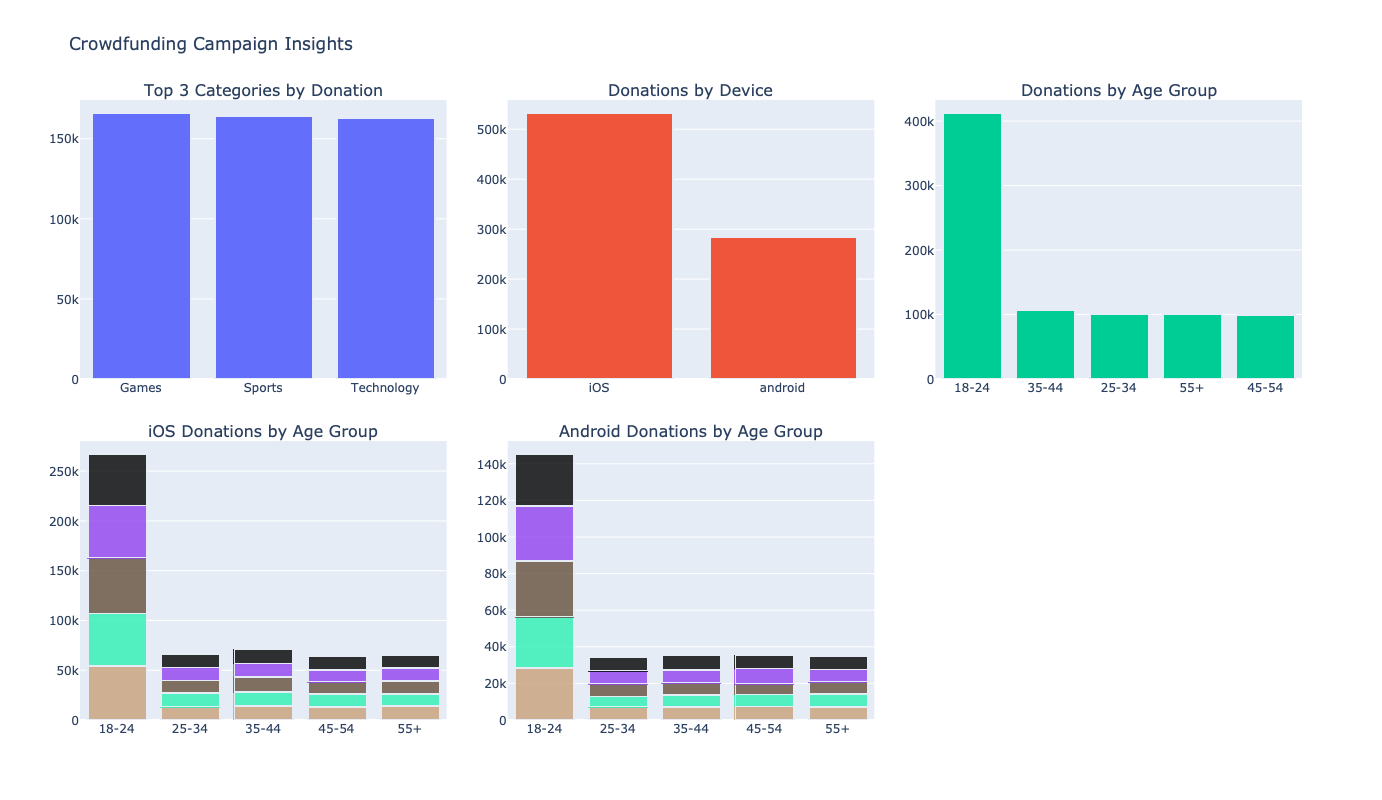

In [10]:
# Initial aggregations
category_donations = data.groupby('category')['amount'].sum().sort_values(ascending=False).head(3)
device_donations = data.groupby('device')['amount'].sum().sort_values(ascending=False)
age_donations = data.groupby('age')['amount'].sum().sort_values(ascending=False)

# Prepare data for iOS and Android stacked bar charts
ios_data = data[data['device'] == 'iOS']
android_data = data[data['device'] == 'android']

# Grouping and pivoting iOS data
ios_grouped = ios_data.groupby(['age', 'category'])['amount'].sum().reset_index()
ios_pivot = ios_grouped.pivot(index='age', columns='category', values='amount').fillna(0)

# Grouping and pivoting Android data
android_grouped = android_data.groupby(['age', 'category'])['amount'].sum().reset_index()
android_pivot = android_grouped.pivot(index='age', columns='category', values='amount').fillna(0)

# Define a consistent color scheme
categories = set(ios_pivot.columns) | set(android_pivot.columns)  # Union of all categories in both iOS and Android data
color_map = {category: f'rgba({(i*100)%255}, {(i*80)%255}, {(i*60)%255}, 0.8)' for i, category in enumerate(categories)}

# Creating subplots
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=("Top 3 Categories by Donation", "Donations by Device", "Donations by Age Group",
                    "iOS Donations by Age Group", "Android Donations by Age Group", ""),
    specs=[[{}, {}, {}], [{}, {}, {}]],
    vertical_spacing=0.1,
    horizontal_spacing=0.05
)

# Adding traces for the initial three visualizations
fig.add_trace(go.Bar(x=category_donations.index, y=category_donations.values), row=1, col=1)
fig.add_trace(go.Bar(x=device_donations.index, y=device_donations.values), row=1, col=2)
fig.add_trace(go.Bar(x=age_donations.index, y=age_donations.values), row=1, col=3)

# iOS contributions by age group and category
for category in ios_pivot.columns:
    fig.add_trace(go.Bar(x=ios_pivot.index, y=ios_pivot[category], name=category, marker_color=color_map[category]), row=2, col=1)

# Android contributions by age group and category
for category in android_pivot.columns:
    fig.add_trace(go.Bar(x=android_pivot.index, y=android_pivot[category], name=category, marker_color=color_map[category]), row=2, col=2)

# Update layout
fig.update_layout(
    barmode='stack',
    title_text="Crowdfunding Campaign Insights",
    showlegend=False,
    width=1200,
    height=800
)

fig.show()